In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **S&P 500**

In [7]:
tickers = ['MRNA', 'PG', '^GSPC']

prices = yf.download(tickers, start='2020-01-01', end='2025-09-16')['Close']

rets = prices.pct_change().dropna()

C:\Users\samue\AppData\Local\Temp\ipykernel_1524\4130323874.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start='2020-01-01', end='2025-09-16')['Close']
[*********************100%***********************]  3 of 3 completed


In [8]:
# CAPM = rf + beta * (rm - rf)

rf = 0.03

rm = rets['^GSPC'].mean() * 252

B_MRNA = rets['MRNA'].cov(rets['^GSPC']) / rets['^GSPC'].var()

B_PG = rets['PG'].cov(rets['^GSPC']) / rets['^GSPC'].var()

In [16]:
CAPM_PG = rf + B_PG * (rm - rf)
ret_PG = rets['PG'].mean() * 252

CAPM_MRNA = rf + B_MRNA * (rm - rf)
ret_MRNA = rets['MRNA'].mean() * 252

results = pd.DataFrame({
    'Ticker': ['MRNA', 'PG'],
    'CAPM': [CAPM_MRNA*100, CAPM_PG*100],
    'Retorno Real': [ret_MRNA*100, ret_PG*100]
})

results


,Ticker,CAPM,Retorno Real
0,MRNA,11.045884,30.920160
1,PG,8.960095,8.883069


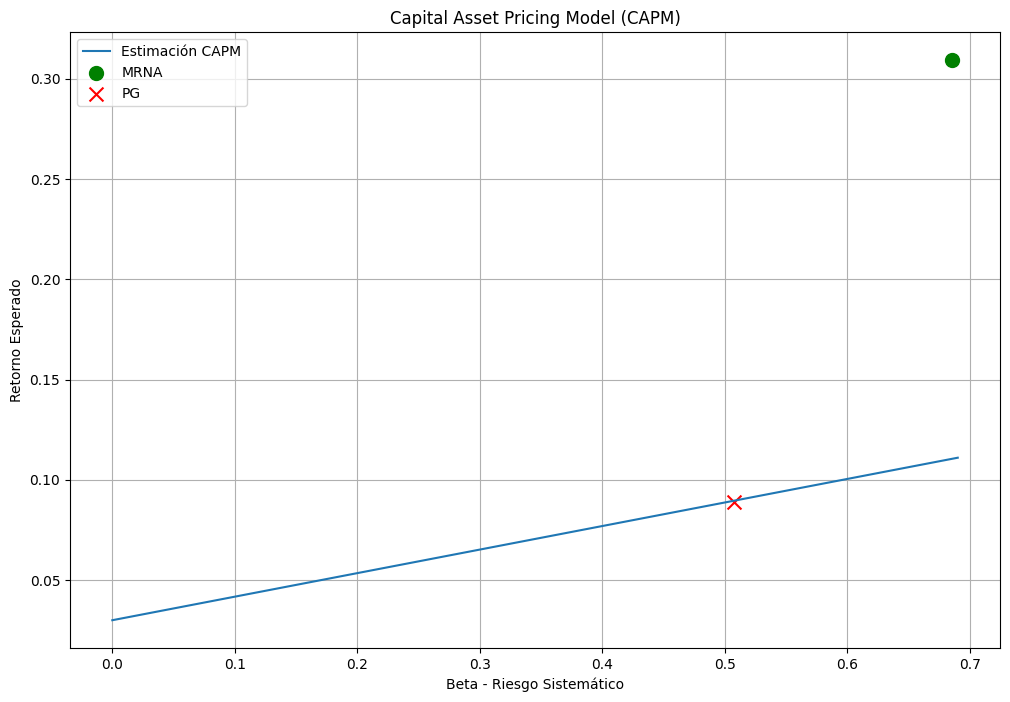

In [22]:
x = np.arange(0, 0.7, 0.01)
y = rf + x * (rm - rf)

plt.figure(figsize=(12,8))
plt.plot(x, y, label='Estimación CAPM')
plt.scatter(B_MRNA, ret_MRNA, color='green', marker='o', label='MRNA', s=100)
plt.scatter(B_PG, ret_PG, color='red', marker='x', label='PG', s=100)

plt.xlabel('Beta - Riesgo Sistemático')
plt.ylabel('Retorno Esperado')
plt.title('Capital Asset Pricing Model (CAPM)')
plt.legend()
plt.grid()
plt.show()